<img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 450px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;  margin-top:40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Statistical trading and Reinforcement Learning</center></div>
<div style= "font-size: 40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>algorithms of NVIDIA stock prices</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Otimização de Estratégias Orientadas por Dados 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Grupo 7:</center></div>
   <div><center> Diogo Freitas | 104841 </center></div>
   <div><center> João Francisco Botas | 104782 </center></div>
   <div><center> Rebeca Sampaio |  126628 </center></div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Bibliotecas para desenvolvimento do projeto</a></li>
    <li><a href="#2">Ticker Atribuído</a></li>
    <li><a href="#3">Extração de dados</a>
        <ol>
            <li><a href="#3.1">Transformação dos dados</a></li>
            <li><a href="#3.2">Estatísticas</a></li>
            <li><a href="#3.3">Gráficos úteis e Dashboard</a></li>
            <li><a href="#3.4">Cálculo das métricas</a></li>
                <ol>
                    <li><a href="#3.4.1">Retornos</a></li>
                    <li><a href="#3.4.2">Retornos médios esperados e risco</a></li>
                </ol>
        </ol>
    </li>
    <li><a href="#4">Estratégia Estatística de Trading</a>
        <ol>
            <li><a href="#4.1">Crossover de Média Móvel Exponencial (EMA)</a></li>
            <li><a href="#4.2">Modelo de Classificação (Machine Learning)</a></li>
        </ol>
    <li><a href="#5">Algoritmo de Reinforcement Learning de Trading</a>
        <ol>
            <li><a href="#5.1">Definição do environment</a></li>
            <li><a href="#5.2">Algoritmos de Q-learning:</a></li>
                <ol>
                    <li><a href="#5.2.1">Algoritmo 1</a></li>
                    <li><a href="#5.2.2">Algoritmo 2</a></li>
                </ol>
            <li><a href="#5.3">Fine-Tune Algoritmos</a></li>
        </ol>
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Bibliotecas para desenvolvimento do projeto** 

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
# import talib as ta
import quantstats as qs
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from tqdm import tqdm
import plotly.graph_objects as go
import mplfinance as mpf
from backtesting import Backtest, Strategy
import gymnasium as gym
from itertools import product
import gym_anytrading
import seaborn as sns

\# Executar este comando na `powershell` para instalar as packages necessárias para elaboração do projeto
```powershell
pip install -r requirements.txt
```

# <a class='anchor' id='2'></a>

> # **2. Ticker Atribuído** 

<div style="text-align: center;">
    <img src="https://th.bing.com/th/id/R.952ab16c7380e16b9f269e04481fabfc?rik=AXlfeVuBYRP54w&pid=ImgRaw&r=0" style="width: 170px; margin-top: 30px;">
</div>

Fundada em 1993, a NVIDIA é uma empresa reconhecida como líder global em tecnologia de computação gráfica, inteligência artificial e soluções de computação acelerada. Desde o lançamento da sua primeira unidade de processamento gráfico (GPU) em 1999, a empresa transformou setores como entretenimento digital, ciência, saúde e automobilismo, posicionando-se como um dos principais impulsionadores da inovação tecnológica no século XXI. Nos últimos anos, a NVIDIA tem se destacado não apenas pela inovação tecnológica, mas também pelo bom desempenho no mercado financeiro, com o valor das suas ações, registando aumentos significativos. Esse crescimento está diretamente relacionado à forte expansão das GPUs de alto desempenho, fundamentais para os domínios da Inteligência Artificial, Cloud Computing e Machine Learning, além do papel essencial da empresa no desenvolvimento de soluções para dataStatsStats centers e tecnologias de ponta.

Este projeto tem como objetivo implementar estratégias estatíticas de trading e treinar um agente de Reinforcement Learning que aprenda a evolução dos stocks da NVIDIA entre o período homólogo de 2019 a 2024. Este agente autonomamente e indiretamente irá tentar perceber as razões por trás do aumento dos seus stocks; a adoção crescente de inteligência artificial nos diversos setores da indústria; as estratégias empresariais; os desafios enfrentados num cenário de constante evolução tecnológica e competitiva.

**NOTA**: Como foi mencionado, irão ser extraídos os dados entre 2019 e 2024, mas mais concretamente de dia 1 de janeiro de 2019 e 31 de outubro de 2024, data de atribuição do enunciado do projeto.

# <a class='anchor' id='3'></a>

> # **3. Extração de dados** 

In [246]:
ticker = "NVDA"
start_date = "2019-01-01" # Não há dia 1 de janeiro de 2019...
end_date = "2024-11-01" # para incluir também o dia 31 de outubro de 2024
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [247]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1469 entries, 2019-01-02 to 2024-10-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  1469 non-null   float64
 1   (Close, NVDA)      1469 non-null   float64
 2   (High, NVDA)       1469 non-null   float64
 3   (Low, NVDA)        1469 non-null   float64
 4   (Open, NVDA)       1469 non-null   float64
 5   (Volume, NVDA)     1469 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 80.3 KB


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2019-01-02,3.378090,3.405500,3.462000,3.251250,3.266000,508752000
2019-01-03,3.173995,3.199750,3.379000,3.192250,3.344750,705552000
2019-01-04,3.377346,3.404750,3.443250,3.242500,3.273500,585620000
2019-01-07,3.556145,3.585000,3.622250,3.410750,3.462500,709160000
2019-01-08,3.467614,3.495750,3.669500,3.422500,3.667250,786016000
...,...,...,...,...,...,...
2024-10-25,141.530243,141.539993,144.130005,140.800003,140.929993,205122100
2024-10-28,140.510315,140.520004,143.139999,140.050003,143.000000,173586700


# <a class='anchor' id='3.1'></a>

> ## **3.1 Transformação de dados**

In [248]:
# see nulls in data
data.isnull().sum()

Price      Ticker
Adj Close  NVDA      0
Close      NVDA      0
High       NVDA      0
Low        NVDA      0
Open       NVDA      0
Volume     NVDA      0
dtype: int64

Após descarregarmos os dados no período indicado, verificamos que não há valores omissos nos 1468 dias/entradas do dataset. Vemos a existência de variavéis que correspondem a:

1. **Date**  
   - Representa a data da observação dos preços históricos (varia entre 01-01-2019 e 31-10-2024);

2. **Adj Close** (Adjusted Close)  
   - O preço ajustado de "fecho" da ação, considerando eventos como dividendos, splits e outras ações corporativas que afetam o valor da ação;

3. **Close**  
   - O preço de "fecho" da ação no final do dia, sem ajustes para eventos corporativos;

4. **High**  
   - O preço mais alto alcançado pela ação durante o dia;

5. **Low**  
   - O preço mais baixo alcançado pela ação durante o dia;

6. **Open**  
   - O preço inicial da ação no início do dia;

7. **Volume**  
   - O número total de ações negociadas durante o dia.

In [249]:
# transformar a data do indice 0para datetime e mostrar só até ao dia (sem horas)
data.index = pd.to_datetime(data.index)
data.index = data.index.strftime('%Y-%m-%d')
data = data.reset_index() # retira-se o index para poder usar a data como coluna

In [250]:
# retirar o MultiIndex das colunas (sempre NVDA e Ticker)
if isinstance(data.columns, pd.MultiIndex):
    data.columns = [' '.join(map(str, col)).strip() for col in data.columns]
data.columns = [col.replace(f"{ticker}", "").replace("Ticker", "").strip() for col in data.columns]
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-01-02,3.378090,3.405500,3.462000,3.251250,3.266000,508752000
1,2019-01-03,3.173995,3.199750,3.379000,3.192250,3.344750,705552000
2,2019-01-04,3.377346,3.404750,3.443250,3.242500,3.273500,585620000
3,2019-01-07,3.556145,3.585000,3.622250,3.410750,3.462500,709160000
4,2019-01-08,3.467614,3.495750,3.669500,3.422500,3.667250,786016000
...,...,...,...,...,...,...,...
1464,2024-10-25,141.530243,141.539993,144.130005,140.800003,140.929993,205122100
1465,2024-10-28,140.510315,140.520004,143.139999,140.050003,143.000000,173586700
1466,2024-10-29,141.240265,141.250000,142.259995,138.899994,140.289993,157593600
1467,2024-10-30,139.330399,139.339996,140.330002,136.809998,139.539993,179418100


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1469 non-null   object 
 1   Adj Close  1469 non-null   float64
 2   Close      1469 non-null   float64
 3   High       1469 non-null   float64
 4   Low        1469 non-null   float64
 5   Open       1469 non-null   float64
 6   Volume     1469 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 80.5+ KB


# <a class='anchor' id='3.2'></a>

> ## **3.2 Estatísticas** 

In [253]:
# Copiar os dados originais
dataStats = data.copy()

# Configurar o Pandas para não usar notação científica e formatar os números com 2 casas decimais
pd.options.display.float_format = '{:.6f}'.format

# Converter a coluna 'Date' para o formato datetime
dataStats['Date'] = pd.to_datetime(dataStats['Date'])

# Adicionar a coluna de ano
dataStats['Year'] = dataStats['Date'].dt.year

# Cálculo das métricas anuais
annual_stats = dataStats.groupby('Year').agg(
    avg_price=('Adj Close', 'mean'),
    max_high=('High', 'max'),  # Máximo anual de High
    min_low=('Low', 'min'),  # Mínimo anual de Low
    avg_volume=('Volume', 'mean'),
    first_close=('Adj Close', 'first'),
    last_close=('Adj Close', 'last')
)

# Cálculo do Retorno Anual (%) 
annual_stats['annual_return_pct'] = (annual_stats['last_close'] - annual_stats['first_close']) / annual_stats['first_close'] * 100

# Cálculo da Volatilidade Anual dos Retornos (Desvio Padrão dos Retornos Diários)
dataStats['daily_return'] = dataStats['Adj Close'].pct_change()

# Cálculo do número de dias de negociação (dias úteis)
annual_stats['trading_days'] = dataStats.groupby('Year')['Date'].apply(lambda x: pd.bdate_range(start=x.min(), end=x.max()).size)

# Calcular a volatilidade usando trading_days
annual_stats['volatility'] = dataStats.groupby('Year')['daily_return'].std() * np.sqrt(annual_stats['trading_days']) * 100  # Volatilidade em %

# Cálculo do número de dias com volume acima da média anual
annual_stats['days_above_avg_vol'] = dataStats.groupby('Year').apply(
    lambda x: (x['Volume'] > annual_stats.loc[x.name, 'avg_volume']).sum()
)

# Calcular a Tendência Linear (Slope) usando a data completa como eixo temporal
annual_stats['trend_slope'] = dataStats.groupby('Year').apply(
    lambda x: np.polyfit((x['Date'] - x['Date'].min()).dt.days, x['Adj Close'], 1)[0]
)

# Adicionar o símbolo de % nas variáveis que são percentuais
annual_stats['annual_return_pct'] = annual_stats['annual_return_pct'].apply(lambda x: f'{x:.2f}%')
annual_stats['volatility'] = annual_stats['volatility'].apply(lambda x: f'{x:.2f}%')

# Exibir o resultado com as colunas desejadas
annual_stats = annual_stats[['annual_return_pct', 'avg_price', 'max_high', 'min_low', 'avg_volume', 'volatility', 'trading_days', 'days_above_avg_vol', 'trend_slope']]

# Exibir o resultado
annual_stats

C:\Users\diogo\AppData\Local\Temp\ipykernel_28204\314796113.py:36: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\diogo\AppData\Local\Temp\ipykernel_28204\314796113.py:41: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,annual_return_pct,avg_price,max_high,min_low,avg_volume,volatility,trading_days,days_above_avg_vol,trend_slope
Year,,,,,,,,,
2019,73.41%,4.338581,6.045250,3.192250,456399666.666667,41.29%,260,94,0.004417
2020,118.02%,9.859559,14.726750,4.517000,480855256.916996,58.84%,261,106,0.026562
2021,124.48%,19.483434,34.646999,11.566500,359558817.460317,45.70%,260,92,0.051868
2022,-51.44%,18.544185,30.711000,10.813000,543163223.107570,64.21%,260,111,-0.036685
2023,246.10%,36.552498,50.548000,14.034000,473557460.000000,49.10%,259,97,0.095347
2024,175.68%,101.594215,144.419998,47.320000,409995164.454976,51.30%,218,98,0.254817


C:\Users\diogo\AppData\Local\Temp\ipykernel_28204\3252322321.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



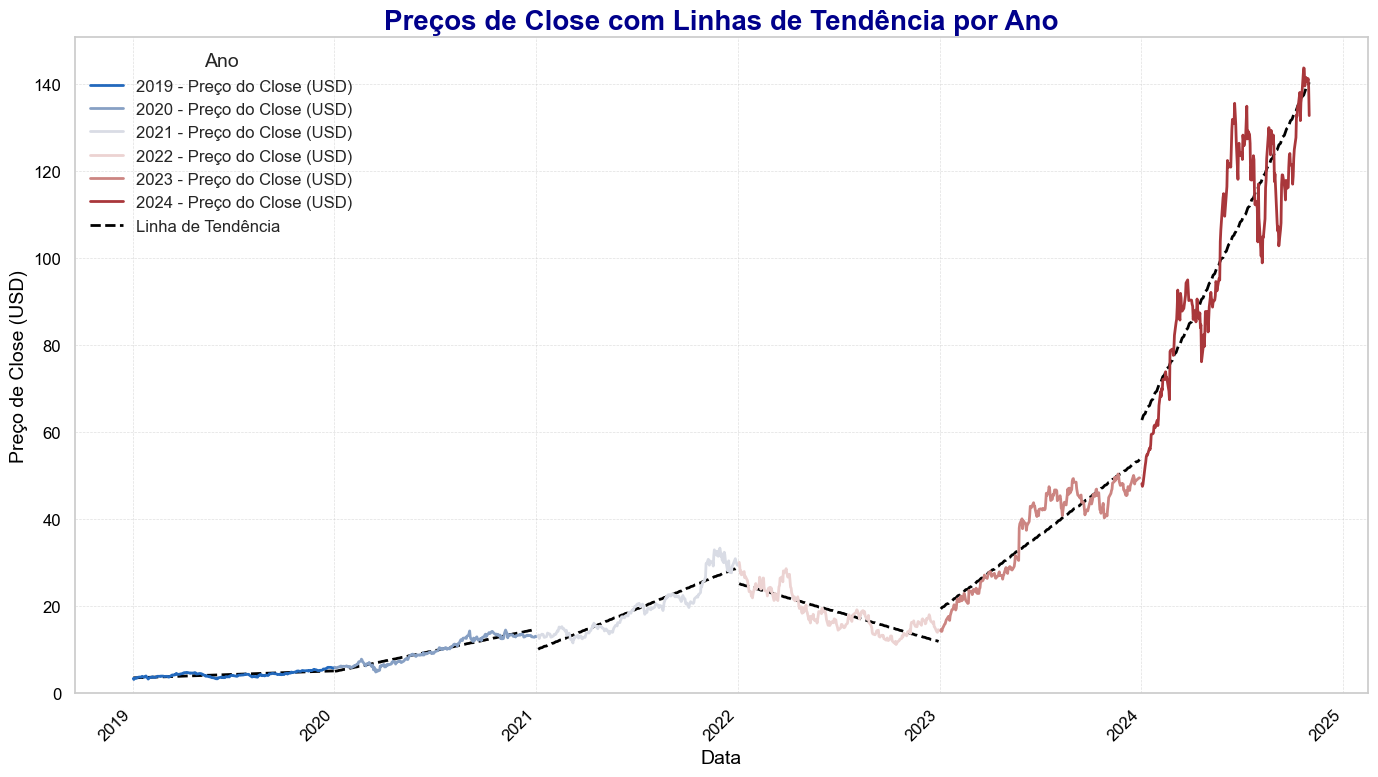

In [254]:
variavel = 'Close'

# Configurar o gráfico
plt.figure(figsize=(14, 8))

# Usar uma paleta de cores suave para as linhas de valores
colors = plt.cm.get_cmap('vlag', len(dataStats['Year'].unique()))  # Paleta de cores mais suave para os anos
unique_years = dataStats['Year'].unique()

# Plotar a linha contínua com cores suaves para os valores de fechamento
for i, year in enumerate(unique_years):
    year_data = dataStats[dataStats['Year'] == year]
    plt.plot(year_data['Date'], year_data[variavel], color=colors(i), label=f'{year} - Preço do {variavel} (USD)', linewidth=2, zorder=2)

# Calcular e adicionar linhas de tendência para cada ano
for i, year in enumerate(unique_years):
    year_data = dataStats[dataStats['Year'] == year]
    x = np.arange(len(year_data))  # Usar o índice como variável independente
    y = year_data[variavel].values
    # Regressão linear: y = mx + b
    m, b = np.polyfit(x, y, 1)  # Regressão linear
    trendline = m * x + b
    # Linha de tendência em preto e mais espessa para destacar
    plt.plot(year_data['Date'], trendline, '--', color='black', linewidth=2, zorder=1, label='Linha de Tendência' if i == 0 else "")

# Configurar o título e rótulos com um design mais limpo
plt.title(f'Preços de {variavel} com Linhas de Tendência por Ano', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Data', fontsize=14, color='black')
plt.ylabel(f'Preço de {variavel} (USD)', fontsize=14, color='black')

# Melhorar o formato do eixo X (datas)
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Ajustar o limite do eixo Y para uma visualização mais limpa
plt.ylim(bottom=0)  # Definir limite inferior do eixo Y para 0 (evitar valores negativos)

# Adicionar uma grade leve e sutil
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6, zorder=0)

# Ajustar a legenda: separar a legenda de linhas de tendência e de valores, dentro do gráfico
plt.legend(title='Ano', title_fontsize=14, fontsize=12, loc='upper left', frameon=False)

# Exibir o gráfico com layout ajustado
plt.tight_layout()  # Ajuste automático do layout para evitar sobreposição de elementos
plt.show()

In [255]:
del annual_stats, dataStats

# <a class='anchor' id='3.3'></a>

> ## **3.3 Gráficos úteis e Dashboard** 

Visualização de um gráfico com o matplotlib de High e Low com área entre os dois para ver flutuações mais evidentes.

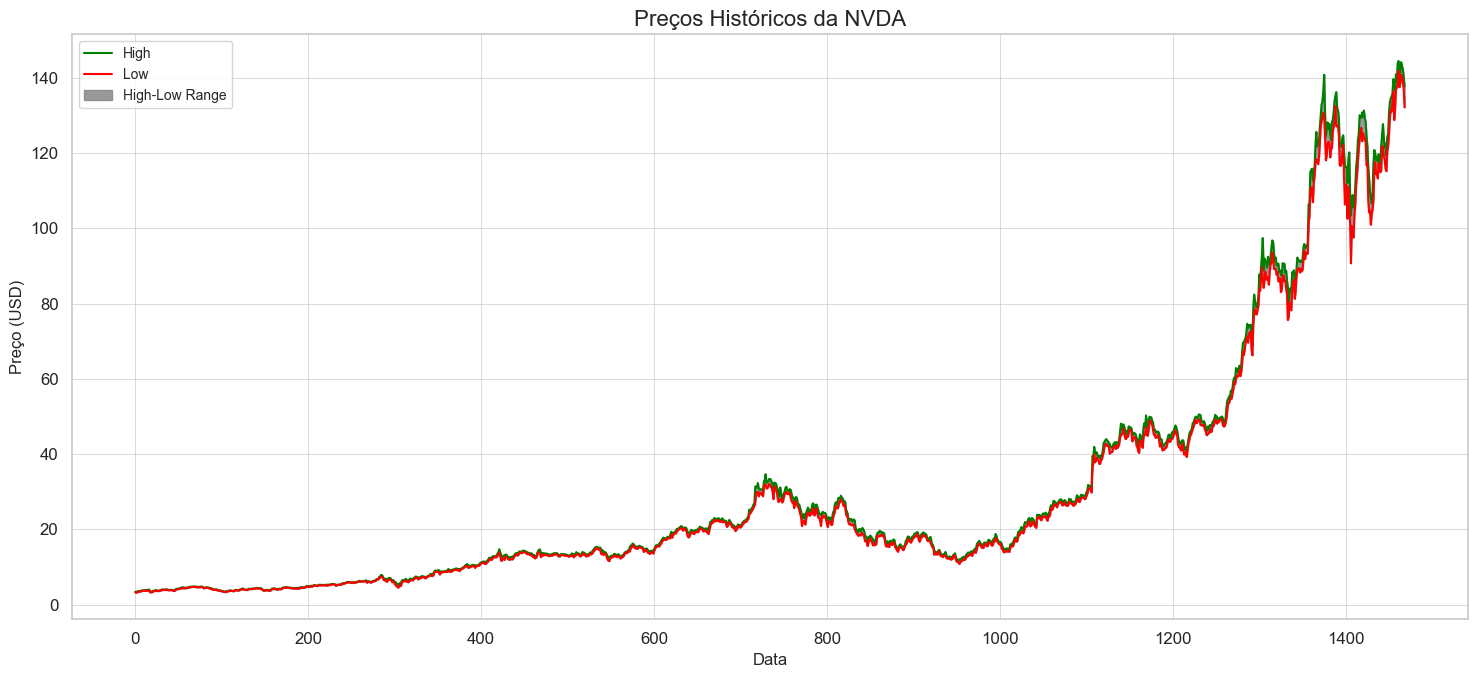

In [256]:
plt.figure(figsize=(15, 7))

# plt.plot(data.index, data['Adj Close'], label="Adj Close", color='blue')
# plt.plot(data.index, data['Close'], label="Close", color='orange')

# mostra apenas os dias de 1 a 1468 (2019-01-02 a 2024-10-31)
plt.plot(data.index, data['High'], label="High", color='green')
plt.plot(data.index, data['Low'], label="Low", color='red')
plt.fill_between(data.index, data['High'], data['Low'], color='grey', alpha=0.8, label='High-Low Range')

plt.title(f"Preços Históricos da {ticker}", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Preço (USD)", fontsize=12)
plt.legend(loc='upper left', fontsize=10)


# Exibir gráfico
plt.tight_layout()
plt.show()

Gráfico OHLC com plotly para ter uma interatividade a mais nas colunas apresentadas.

Foi inspirado nos links seguintes:
- https://plotly.com/python/ohlc-charts/
- https://dash.plotly.com/tutorial?utm_medium=graphing_libraries&utm_content=python_footer&_gl=1 (ver como se faz)


In [257]:
# TODO: ver este gráfico melhor

fig = go.Figure(data=go.Ohlc(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close']))
fig.update(layout_xaxis_rangeslider_visible=False)

fig.update_layout(
    title=dict(text=f'Gráfico OHLC da {ticker}'),
    yaxis=dict(title=dict(text='Preço (USD)')),
    # shapes = [dict(
    #    x0='2023-05-25', x1='2023-05-25', y0=0, y1=1, xref='x', yref='paper',
    #    line_width=2)],
    #annotations=[dict(
    #    x='2023-05-25', y=0.05, xref='x', yref='paper',
    #    showarrow=False, xanchor='left', text='AI Chip announcement')]
)

fig.show()

Foi realizado um dashboard que mostra algumas visualizações interativas dos stocks da NVIDIA para o período específico.

Esse ficheiro encontra-se em (assumindo que estamos em .\OEOD\notebooks):

```powershell
cd ..
cd .\src\
python dashboard_OEOD-Grupo7.py
```

# <a class='anchor' id='3.4'></a>

> ## **3.4. Cálculo das métricas** 

# <a class='anchor' id='3.4.1'></a>

> ### **3.4.1 Retornos** 

Taxa de return entre o dia anterior e presente.

Transforma-se a Data em index outra vez para podermos ter uma referência mais correta da data e do retorno nesse dia versus dia anterior.

In [258]:
returns = data["Close"].pct_change() # mudar o intervalo de datas para não ter omissos maybe; está FEITO mas ter cuidado!!!
# Calcular a soma e a média dos retornos diários
returns_sum = returns.sum()
returns_mean = returns.mean()

# Exibir os resultados
print(f'Soma dos retornos diários: {returns_sum}')
print(f'Média dos retornos diários: {returns_mean}')
print(f'Asset Expected Return: {returns_mean / len(data)}')

Soma dos retornos diários: 4.457202894137319
Média dos retornos diários: 0.0030362417534995365
Asset Expected Return: 2.0668766191283433e-06


# <a class='anchor' id='3.4.2'></a>

> ### **3.4.2 Retornos médios esperados e risco** 

In [259]:
# daily risk free rate
rf = (1.02 ** (1/360))-1
# Calculate volatilities , expected returns and sharpe ratios.
volatility = returns.std() # volatility
exp_returns = returns.mean() # expected returns
sr = (exp_returns-rf)/volatility # Sharpe ratio

print(f"O return esperado é de: {exp_returns}")
print(f"O risco é de: {volatility}")
print(f"O Sharpe ratio é de: {sr}")

O return esperado é de: 0.0030362417534995365
O risco é de: 0.0329278427427735
O Sharpe ratio é de: 0.09053836189070488


<div style="font-size: 13px;">

| Métrica               | Fórmula                           | Valor          | Explicação                                                                                 |
|-----------------------|------------------------------------|----------------|-------------------------------------------------------------------------------------------|
| **Taxa Livre de Risco (rf)** | $rf = (1 + 0.02)^{\frac{1}{360}} - 1$ | `5.50088e-05` | Taxa de return diário sem risco, assumindo uma taxa anual de 2% e ajustada para 360 dias úteis. |
| **Volatilidade**       | $\sigma = \text{std}(\text{returns})$ | `0.032928`        | O desvio padrão dos returns diários, que indica a variabilidade ou risco do ativo.       |
| **Return Esperado**   | $\mu = \text{mean}(\text{returns})$ | `0.003036`        | A média dos returns diários, ou seja, o return esperado do ativo.                |
| **Sharpe Ratio (sr)**  | $SR = \frac{\mu - rf}{\sigma}$ | `0.090538`        | Medida de return ajustado ao risco, calculada como o excesso do return dividido pela volatilidade. |

</div>


In [216]:
# define function that compute CAGR
def cagr(start_value , end_value , num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1
# example
start_value = float(data["Close"].iloc[0])
end_value = float(data["Close"].iloc[-1])
num_periods = len(data["Close"])
result = cagr(start_value , end_value , num_periods)
print(f"CAGR: {result}")

CAGR: 0.0024984505386265177


# <a class='anchor' id='4'></a>

> # **4. Estratégia Estatística de Trading** 

In [ ]:
data.set_index('Date', inplace=True)

# <a class='anchor' id='4.1'></a>

> ## **4.1 Crossover de Média Móvel Exponencial (EMA)** 

Foi utilizado este método porque o preço de NVIDIA cresceu exponencialmente no período estudado e também porque queremos dar mais destaque aos dados mais recentes do período indicado. Há razões externas que levam à subida dos stocks da NVIDIA.
Links úteis:
- Ver conceitos do método de Média Móvel Exponencial: https://www.investopedia.com/terms/e/ema.asp
- Ver função ewn() do pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
- Ver aplicabilidades deste método (mini revisão-literatura):
    + https://www.investopedia.com/terms/g/goldencross.asp
    + https://www.forexstrategieswork.com/exponential-moving-average-indicator-stay-on-the-right-side-of-the-trend-with-the-ema-indicator/

<div style="text-align: center;">
    <img src="https://natahbali.wordpress.com/wp-content/uploads/2012/01/ema.gif" style="width: 500px; margin-top: 30px;">
</div>

In [225]:
# copy data para não alterar o original!!
data_plus = data.copy()

span_fast = 20
span_slow = 140 # mudado de 200 para 150, resultados semelhantes (tmb com 130)

data_plus['EMA_Fast'] = data_plus['Close'].ewm(span=span_fast, adjust=False).mean() # pode ser ajustado entre 10 e 20
data_plus['EMA_Slow'] = data_plus['Close'].ewm(span=span_slow, adjust=False).mean() # TODO: pode-se ajustar isto entre 50 e 200

# PÓS-REUNIÃO: colocar no slow 150, 170, etc.

# estrategia de crossover
data_plus['Signal'] = np.where(data_plus['EMA_Fast'] > data_plus['EMA_Slow'], 1, 0) # 1 for buy, 0 for sell
data_plus['Position'] = data_plus['Signal'].diff()


data_plus['Crossover'] = None # começa vetor de nulos
data_plus['Crossover'] = np.where(
    (data_plus['EMA_Fast'] > data_plus['EMA_Slow']) & (data_plus['EMA_Fast'].shift(1) <= data_plus['EMA_Slow'].shift(1)),
    'fast_above',
    np.where(
        (data_plus['EMA_Slow'] > data_plus['EMA_Fast']) & (data_plus['EMA_Slow'].shift(1) <= data_plus['EMA_Fast'].shift(1)),
        'slow_above',
        None
    )
)
data_plus['Crossover'] = data_plus['Crossover'].astype('object')

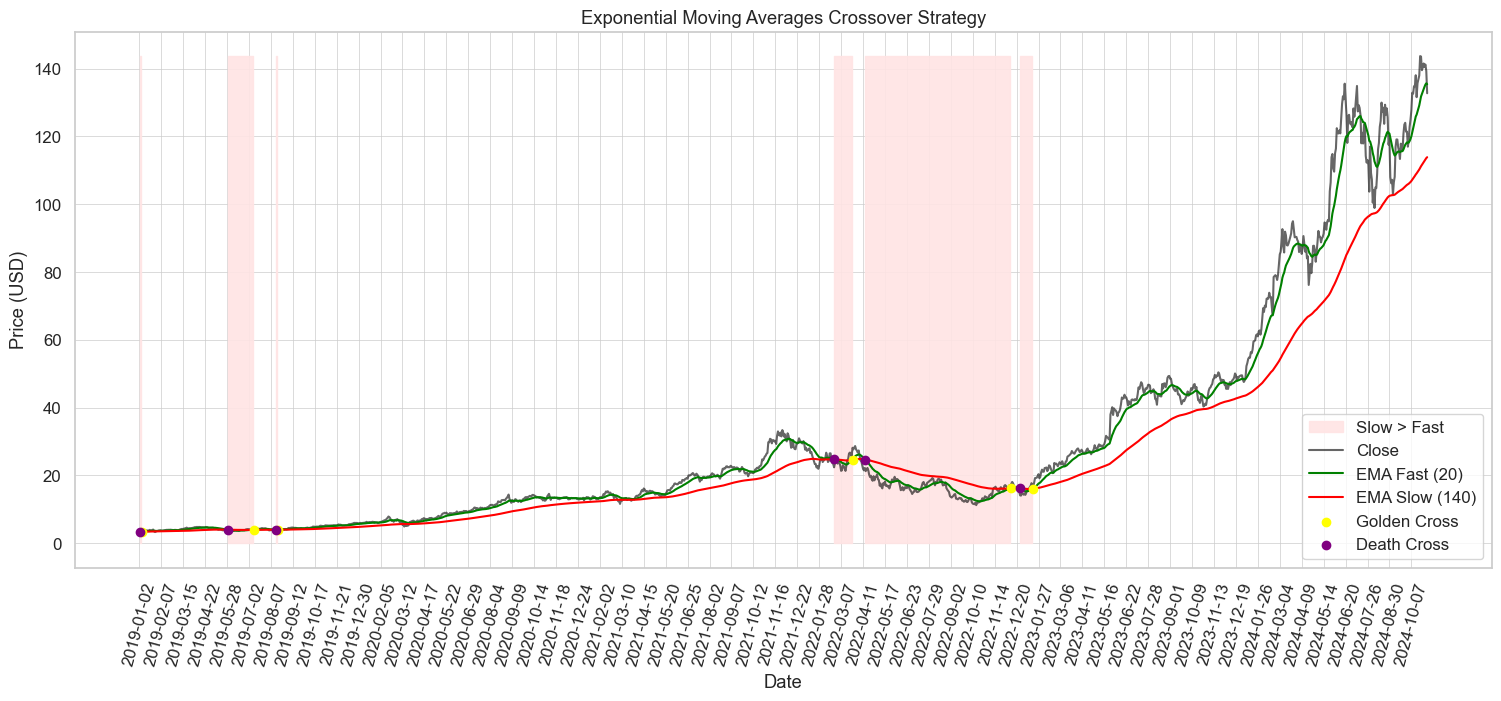

Cumulative Strategy Returns: 23.09


In [226]:
plt.figure(figsize=(15, 7))
'''
plt.fill_between(
    data_plus.index,
    data_plus['Close'].min(),
    data_plus['Close'].max(),
    where=data_plus['EMA_Fast'] > data_plus['EMA_Slow'],
    color='#E5FFE4',
    alpha=0.9,
    label='Fast > Slow'
)
'''
plt.fill_between(
    data_plus.index,
    0, data_plus['Close'].max(),
    where=data_plus['EMA_Slow'] > data_plus['EMA_Fast'],
    color='#FFE4E4',
    alpha=0.9,
    label='Slow > Fast'
)

########
plt.plot(data_plus['Close'], label="Close", color='black', alpha=0.6)
plt.plot(data_plus['EMA_Fast'], label=f"EMA Fast ({span_fast})", color='green')
plt.plot(data_plus['EMA_Slow'], label=f"EMA Slow ({span_slow})", color='red')
plt.scatter(
    data_plus.index[data_plus['Crossover'] == 'fast_above'],
    data_plus['EMA_Slow'][data_plus['Crossover'] == 'fast_above'],
    color='yellow',
    label='Golden Cross',
    zorder=5
)
plt.scatter(
    data_plus.index[data_plus['Crossover'] == 'slow_above'],
    data_plus['EMA_Slow'][data_plus['Crossover'] == 'slow_above'],
    color='purple',
    label='Death Cross',
    zorder=5
)
plt.title("Exponential Moving Averages Crossover Strategy")
plt.legend()

# para o eixo do x não ficar com tantos valores e com sobreposição
plt.xticks(ticks=data_plus.index[::25], labels=data_plus.index[::25], rotation=75) # ::35 intervalos de 35 em 35 dias
plt.tight_layout() 

plt.xlabel("Date") 
plt.ylabel("Price (USD)") 
plt.show()

# fazer backtest da estratégia
data_plus['Daily Returns'] = data_plus['Close'].pct_change() 
data_plus['Strategy Returns'] = data_plus['Daily Returns'] * data_plus['Signal'].shift(1) # "lag" de 1 dia 
cumulative_strategy_returns = (1 + data_plus['Strategy Returns']).cumprod()

print(f"Cumulative Strategy Returns: {cumulative_strategy_returns.iloc[-1]:.2f}")

In [16]:
data_plus

,Adj Close,Close,High,Low,Open,Volume,EMA_Fast,EMA_Slow,Signal,Position,Crossover,Daily Returns,Strategy Returns
Date,,,,,,,,,,,,,
2019-01-02,3.378090,3.405500,3.462000,3.251250,3.266000,508752000,3.405500,3.405500,0,NaN,None,NaN,NaN
2019-01-03,3.173995,3.199750,3.379000,3.192250,3.344750,705552000,3.397431,3.403453,0,0.000000,slow_above,-0.060417,-0.000000
2019-01-04,3.377346,3.404750,3.443250,3.242500,3.273500,585620000,3.397718,3.403466,0,0.000000,None,0.064068,0.000000
2019-01-07,3.556145,3.585000,3.622250,3.410750,3.462500,709160000,3.405063,3.405272,0,0.000000,None,0.052941,0.000000
2019-01-08,3.467614,3.495750,3.669500,3.422500,3.667250,786016000,3.408619,3.406172,1,1.000000,fast_above,-0.024895,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-25,141.530243,141.539993,144.130005,140.800003,140.929993,205122100,126.509388,103.456327,1,0.000000,None,0.008048,0.008048
2024-10-28,140.510315,140.520004,143.139999,140.050003,143.000000,173586700,127.058824,103.825119,1,0.000000,None,-0.007206,-0.007206
2024-10-29,141.240265,141.250000,142.259995,138.899994,140.289993,157593600,127.615341,104.197506,1,0.000000,None,0.005195,0.005195


# <a class='anchor' id='4.2'></a>

> ## **4.2 Modelo de Regressão (Machine Learning)** 

Coefficients: [0.33107175 0.31618829 0.30951559]
Interception: 0.0042827714563711955


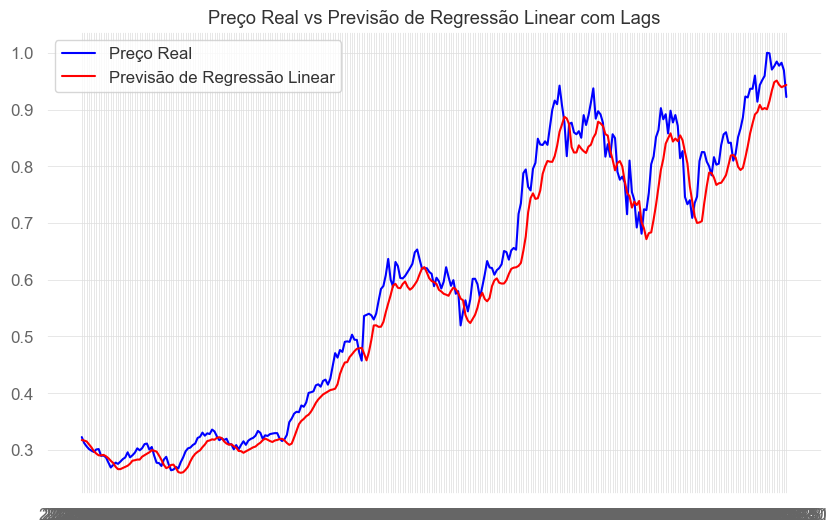

In [17]:
data_plus_RL = data.copy()
for i in range(2, 5):
    data_plus_RL[f'Lag_{i}'] = data_plus_RL['Close'].shift(i)
data_plus_RL.dropna(inplace=True)

scaler = MinMaxScaler()
data_plus_RL[['Close', 'Lag_2', 'Lag_3', 'Lag_4']] = scaler.fit_transform(data_plus_RL[
    ['Close', 'Lag_2', 'Lag_3', 'Lag_4'] # vars a normalizar
    ])

X = data_plus_RL[['Lag_2', 'Lag_3', 'Lag_4']]
y = data_plus_RL['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

'''
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
'''

model_ridge = Ridge(alpha=1.0) # regularização L2 (ridge) 
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

print(f"Coefficients: {model_ridge.coef_}")
print(f"Interception: {model_ridge.intercept_}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Preço Real', color='blue')
plt.plot(y_test.index, y_pred_ridge, label='Previsão de Regressão Linear', color='red')
plt.legend()
plt.title("Preço Real vs Previsão de Regressão Linear com Lags")
plt.show()
# TODO: está com overfitting, tentar melhorar e ver outras formas de prever

```{python}
# Apenas era para ver como ficariam os estados -> DEIXAR A MARKDOWN
def get_state_from_prediction(predicted_price, current_price):
    '''
    diff entre o preço atual e o preço previsto
    multiplicado por 100 para gerar um estado DISCRETIZADO
    '''
    state = int((predicted_price - current_price) * 100) # multiplicar por 100 para discretizar
    return state

# Gerar os estados com base nas previsões
data_plus_RL['Predicted_Price'] = model_ridge.predict(data_plus_RL[['Lag_2', 'Lag_3', 'Lag_4']])  # Previsões para todos os dados
data_plus_RL['State'] = data_plus_RL.apply(lambda row: get_state_from_prediction(row['Predicted_Price'], row['Close']), axis=1)

# Verificar os estados gerados
data_plus_RL[['Close', 'Predicted_Price', 'State']].head()

# Exibir um gráfico de estados (para visualização)
plt.figure(figsize=(10, 6))
plt.plot(data_plus_RL.index, data_plus_RL['State'], label='Estados gerados a partir da previsão')
plt.title("Estados gerados com base na regressão linear com Lags")
plt.legend()
plt.show()
```

# <a class='anchor' id='4.3'></a>

> ## **4.3 Modelo de Classificação (Machine Learning)** 
/# TODO: está mal, acho eu

- A variável Target serão as três ações possíveis; ou seja, 1- Buy, 2- Sell, 3- Stay
- Que variáveis podem ser utilizadas para prever o Target?
- O `get_state_ML()` será obtido através do Predicted Signal?
- Fazer Backtest da estratégia

```{python}
data_plus_ML = data[['Close']].copy()

# 1. criar as preditoras com os "lags" de returns
data_plus_ML['Return'] = data_plus_ML['Close'].pct_change() 
######################################
data_plus_ML['Lag1'] = data_plus_ML['Return'].shift(1)
data_plus_ML['Lag2'] = data_plus_ML['Return'].shift(2)
data_plus_ML['Lag3'] = data_plus_ML['Return'].shift(3)
data_plus_ML['Lag4'] = data_plus_ML['Return'].shift(4)
data_plus_ML['Volatility'] = data_plus_ML['Return'].rolling(window=5).std() # desvio padrão, media movel de 5 dias 
data_plus_ML['Momentum'] = data_plus_ML['Close'] - data_plus_ML['Close'].shift(5) # diferença entre o preço de hoje e o de 5 dias atrás
######################################

# 2. criar o alvo com 3 classes: Buy, Sell e Hold (açoes)
threshold = 0.3/100  # Limiar de 0.3% para definir Buy e Sell
data_plus_ML['Future_Return'] = data_plus_ML['Close'].pct_change().shift(-1)  # Retorno futuro de 1 dia

# Definir as classes
 # TODO: três classes não está a dar, ver melhor
data_plus_ML['Target'] = np.where(data_plus_ML['Future_Return'] > threshold, 2,   # Buy = 2
                 np.where(data_plus_ML['Future_Return'] < -threshold, 0, # Sell = 0
                          1))                                     # Hold = 1

# data_plus_ML['Target'] = np.where(data_plus_ML['Return'] > 0, 1, 0)

data_plus_ML = data_plus_ML.dropna() # tirar nulos (à partida só 5 linhas)

X = data_plus_ML[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Volatility', 'Momentum']]
y = data_plus_ML['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
```

```{python}
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

model_xgb = XGBClassifier(n_estimators=500, eval_metric='mlogloss', # mlogloss = multiclass logloss; logloss = binary logloss
                          early_stopping_rounds=50
                          ) # https://xgboosting.com/xgboost-configure-mlogloss-eval-metric/
tscv = TimeSeriesSplit(n_splits=5)
random_search = RandomizedSearchCV(estimator=model_xgb, 
                                   param_distributions=param_grid, 
                                   n_iter = 20, cv = tscv, verbose=1, n_jobs=-1, 
                                   random_state = 42) # escolher seed 
#random_search.fit(X_train, y_train) # sem early stopping
random_search.fit(X_train, y_train, eval_set=[(X_test, y_test)]) # com early stopping

best_model = random_search.best_estimator_
print("Melhores hiperparâmetros encontrados:", random_search.best_params_)
y_pred = best_model.predict(X_test)
```

```{python}
importances = best_model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.show()
```

```{python}
# Avaliação do modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# backtest
data_plus_ML.loc[X_test.index, 'Prediction'] = y_pred

# Gerar sinais de trading
# TODO: três classes não está a dar, ver melhor // TALVEZ NAO SEJA PRECISO ISTO
data_plus_ML['Signal'] = np.where(data_plus_ML['Prediction'] == 2, 2,   # Buy
                         np.where(data_plus_ML['Prediction'] == 0, 0, 1))  # Sell ou Hold

# data_plus_ML['Signal'] = data_plus_ML['Prediction']
data_plus_ML['Strategy_Return'] = data_plus_ML['Return'] * data_plus_ML['Signal'].shift(1) # TODO: VER SE DÁ PARA MUDAR ISTO
data_plus_ML['Cumulative_Strategy'] = (1 + data_plus_ML['Strategy_Return']).cumprod()
data_plus_ML['Cumulative_Market'] = (1 + data_plus_ML['Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data_plus_ML['Cumulative_Strategy'], label="Estratégia XGBoost", color="green")
plt.plot(data_plus_ML['Cumulative_Market'], label="Return do Mercado", color="blue", alpha=0.7)
plt.title(f"Desempenho da Estratégia XGBoost (Buy, Sell e Hold) vs Mercado ({ticker})")
plt.legend()
plt.show()
```

# <a class='anchor' id='5'></a>

> # **5. Algoritmo de Reinforcement Learning de Trading** 

# <a class='anchor' id='5.1'></a>

> ## **5.1 Definição do environment**

In [18]:
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_140'] = data['Close'].ewm(span=140, adjust=False).mean()
# data['SMA_10'] = data['Close'].rolling(window=10).mean() # testes
# data['SMA_50'] = data['Close'].rolling(window=50).mean() # testes
prices = data['Close'].values

# scale the 3 variables above
scaler = MinMaxScaler()
data[['Close', 'EMA_50', 'EMA_140']] = scaler.fit_transform(data[['Close', 'EMA_50', 'EMA_140']])
data.dropna(inplace=True)
data

,Adj Close,Close,High,Low,Open,Volume,EMA_50,EMA_200
Date,,,,,,,,
2019-01-02,3.378090,0.001464,3.462000,3.251250,3.266000,508752000,0.000065,0.000020
2019-01-03,3.173995,0.000000,3.379000,3.192250,3.344750,705552000,0.000000,0.000000
2019-01-04,3.377346,0.001459,3.443250,3.242500,3.273500,585620000,0.000002,0.000000
2019-01-07,3.556145,0.002742,3.622250,3.410750,3.462500,709160000,0.000061,0.000018
2019-01-08,3.467614,0.002107,3.669500,3.422500,3.667250,786016000,0.000090,0.000027
...,...,...,...,...,...,...,...,...
2024-10-25,141.530243,0.984556,144.130005,140.800003,140.929993,205122100,0.985989,0.986477
2024-10-28,140.510315,0.977297,143.139999,140.050003,143.000000,173586700,0.990389,0.990113
2024-10-29,141.240265,0.982492,142.259995,138.899994,140.289993,157593600,0.994846,0.993785


In [19]:
# Define Q-learning parameters
num_states = 100  # Discretize state space
num_actions = 3  # 0 = Hold, 1 = Buy, 2 = Sell
q_table = np.zeros((num_states, num_actions))
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995
min_epsilon = 0.01

# Discretize states
def get_state_exponencial(row):
    '''
    return do int que tem os valores de EMA_10 e EMA_50 multiplicados por 10 (multiplicados por 10 porque é da escala)
    '''
    state = int(row['EMA_50'] * 10 + row['EMA_140'] * 10)
    return state

'''
def get_state(row):
    return int(row['SMA_10'] * 10 + row['SMA_50'] * 10)
'''

data['State'] = data.apply(get_state_exponencial, axis=1).astype(int)

# Initialize variables
initial_balance = 1000
balance = initial_balance
position = 0  # 1 if holding the currency, 0 otherwise
transaction_fee = 0.001  # 0.1% fee

# <a class='anchor' id='5.2'></a>

> ## **5.2 Algoritmos de Q-learning:**

# <a class='anchor' id='5.2.1'></a>

> ## **5.2.1 Algoritmo 1**

- Escolha do estado: $int(\text{EMA}(50)\times 10 + \text{EMA}(200)\times 10)$;
- Reward: o balanço atual - inicial;

In [20]:
# Training
for episode in tqdm(range(500), # Train for 500 episodes
                    desc="Training Agent", 
                    bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}{postfix}]', 
                    colour='green', ncols=80):  
    
    balance = initial_balance
    position = 0
    for t in range(len(data) - 1):
        state = data.iloc[t]['State']
        state = int(state) # TODO: ver se é preciso // VERSÃO IMPORVISADA
        if np.random.rand() < epsilon:
            action = np.random.choice(num_actions)  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Take action
        next_state = data.iloc[t + 1]['State']
        next_state = int(next_state) # TODO: ver se é preciso // VERSÃO IMPORVISADA
        reward = 0
        if action == 1:  # Buy
            if position == 0:
                position = balance / prices[t]  # Buy currency
                balance -= position * prices[t] * (1 + transaction_fee)
        elif action == 2:  # Sell
            if position > 0:
                balance += position * prices[t] * (1 - transaction_fee)  # Sell currency
                position = 0
                reward = balance - initial_balance  # Profit or loss
        else:  # Hold
            reward = 0

        # Update Q-table
        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)


Training Agent: 100%|████████████████████████████████████| 500/500 [00:32<00:00]


In [21]:
# Test the agent
print("Q-table:", q_table)

# Evaluate strategy
final_balance = balance + (position * prices[-1] if position > 0 else 0)
print(f"Initial balance: {initial_balance}")
print(f"Final balance: {final_balance}")

Q-table: [[ 80.19482176  83.39898062 140.34970688]
 [133.91467885 133.64373806 157.23939179]
 [123.52296466 123.36795493 135.497876  ]
 [202.18646524 203.57483597 269.58555382]
 [436.22127774 435.44369376 445.5937214 ]
 [403.86650536 374.235712   399.56653183]
 [451.54558179 462.90261697 521.01022659]
 [611.76895196 597.43919069 671.82393601]
 [842.77418706 840.85242099 923.14132249]
 [858.61838179 850.32832081 881.75936588]
 [754.84609233 755.40707492 758.31773095]
 [724.11988587 728.51157737 754.29823371]
 [843.24067902 835.69327128 835.51315538]
 [896.45425815 906.57164878 908.8761576 ]
 [787.82303692 797.88333437 919.40140295]
 [705.69762137 694.44224604 842.85116119]
 [561.99943987 549.356602   605.56994551]
 [412.48230344 461.00433686 602.04780546]
 [349.33439716 361.80747851 569.95258796]
 [137.55784403 142.97992025 167.27599864]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.      

# <a class='anchor' id='5.2.2'></a>

> ## **5.2.2 Algoritmo 2**

- Escolha do estado: $int(\text{EMA}(50)\times 10 + \text{EMA}(200)\times 10)$;
- Reward: sharpe ratio;
- Hiperparâmetros mudados com os do fine-tune (secção 5.3) -> EMA(50,200);

In [22]:
##################################
## Hiperparâmetros da secção 5.3##
alpha = 0.5  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.99
##################################

for episode in tqdm(range(500), # Train for 500 episodes
                    desc="Training Agent", 
                    bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}{postfix}]', 
                    colour='green', ncols=80):  
    ##############################
    cumulative_returns = []
    balance = initial_balance
    position = 0
    ##############################
    for t in range(len(data) - 1):
        state = data.iloc[t]['State']
        state = int(state)
        
        if np.random.rand() < epsilon:
            action = np.random.choice(num_actions)  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Realizar ação
        next_state = data.iloc[t + 1]['State']
        next_state = int(next_state)
        reward = 0

        if action == 1:  # Buy
            if position == 0:
                position = balance / prices[t]
                balance -= position * prices[t] * (1 + transaction_fee)
        elif action == 2:  # Sell
            if position > 0:
                balance += position * prices[t] * (1 - transaction_fee)
                transaction_return = (balance - initial_balance) / initial_balance
                cumulative_returns.append(transaction_return)
                position = 0

                # Sharpe Ratio como Reward
                if len(cumulative_returns) > 1:
                    returns = np.array(cumulative_returns)
                    avg_return = returns.mean()
                    std_return = returns.std()
                    sharpe_ratio = (avg_return - rf) / std_return if std_return > 0 else 0
                    reward = sharpe_ratio

        # Atualizar Q-table
        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )


Training Agent: 100%|████████████████████████████████████| 500/500 [00:38<00:00]


In [23]:
# Test the agent
print("Q-table:", q_table)

# Evaluate strategy
final_balance = balance + (position * prices[-1] if position > 0 else 0)
print(f"Initial balance: {initial_balance}")
print(f"Final balance: {final_balance}")

Q-table: [[19.22756822 14.82693114 15.58585117]
 [16.14515426 15.72366542 16.12461697]
 [13.48716428 14.10775859 14.5882421 ]
 [14.334501   14.28444832 14.34579121]
 [13.67483588 13.0556415  13.79583198]
 [12.94634482 12.65743409 13.5426266 ]
 [13.24747861 11.87129569 13.4574502 ]
 [11.94902579 13.12117202 14.09963467]
 [11.81969424 12.04179791 12.85915852]
 [11.44558115 11.48136884 12.33296928]
 [11.51714031 11.0326974  11.92188218]
 [12.54387518 12.22036373 12.62232399]
 [10.83017422 10.46768597 11.34958363]
 [10.9807264  10.9572568  11.93454429]
 [11.18945439 11.83616798 12.65708832]
 [10.14886331 10.43932014 10.21523836]
 [10.37545107 10.24839042 10.97241791]
 [10.56234195  9.70372577 11.20456945]
 [ 9.9996393   8.45483712 10.70995527]
 [ 7.80495974  3.86943408  8.62138081]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0

# <a class='anchor' id='5.3'></a>

> ## **5.3 Fine-Tune Algoritmos**

--------------------------------------------------------------------------------------------------------------------
#### EMA(fast,slow) = (10,70)

Grid Search: 100%|██████████| 36/36 [18:00<00:00, 30.02s/it]

```
alpha_space = [0.1, 0.2, 0.5]         # Taxa de aprendizagem
gamma_space = [0.9, 0.95, 0.99]       # Fator de desconto
epsilon_space = [1.0, 0.5]            # Taxa inicial de exploração
epsilon_decay_space = [0.995, 0.99]   # Decaimento de exploração
```


Top 5 Configurações de Hiperparâmetros:

- Alpha: 0.1, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1515.50, Sharpe Ratio: 3.37
- Alpha: 0.2, Gamma: 0.9, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 2335.11, Sharpe Ratio: 2.27
- Alpha: 0.1, Gamma: 0.9, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1267.52, Sharpe Ratio: 2.26
- Alpha: 0.5, Gamma: 0.9, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 2405.73, Sharpe Ratio: 2.09
- Alpha: 0.2, Gamma: 0.95, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1396.41, Sharpe Ratio: 2.03

--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------
#### EMA(fast,slow) = (50,200)

Grid Search: 100%|██████████| 54/54 [35:58<00:00, 39.97s/it] 

```
alpha_space = [0.1, 0.2, 0.5]         # Taxa de aprendizagem
gamma_space = [0.9, 0.95, 0.99]       # Fator de desconto
epsilon_space = [1.0, 0.7, 0.5]       # Taxa inicial de exploração
epsilon_decay_space = [0.995, 0.99]   # Decaimento de exploração
```


Top 5 Configurações de Hiperparâmetros:

- Alpha: 0.5, Gamma: 0.95, Epsilon: 1.0, Epsilon Decay: 0.99, Final Balance: 2257.21, Sharpe Ratio: 4.07
- Alpha: 0.5, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1730.85, Sharpe Ratio: 3.52
- Alpha: 0.2, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.995, Final Balance: 1266.84, Sharpe Ratio: 3.33
- Alpha: 0.2, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1423.31, Sharpe Ratio: 3.18
- Alpha: 0.1, Gamma: 0.99, Epsilon: 0.7, Epsilon Decay: 0.995, Final Balance: 1689.74, Sharpe Ratio: 3.11

--------------------------------------------------------------------------------------------------------------------